#Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and processing

In [3]:
#loading data
car_dataset=pd.read_csv('car data.csv')

In [4]:
#inspecting data frame
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
#rows and column check
car_dataset.shape

(301, 9)

In [6]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
#column details
#mainly done to check for missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
#categorical data distribution check
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [17]:
#encoding dataset
car_dataset['Fuel_Type'] = car_dataset['Fuel_Type'].replace({'Petrol':0,'Diesel':1,'CNG':2}).astype(int)
car_dataset['Seller_Type'] = car_dataset['Seller_Type'].replace({'Dealer':0,'Individual':1}).astype(int)
car_dataset['Transmission'] = car_dataset['Transmission'].replace({'Manual':0,'Automatic':1}).astype(int)

In [18]:
#confirming change of type of 3 columns
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


In [19]:
#rechecking dataset
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Data Filter

In [20]:
#we need to remove selling price and car name as they are irrelvant in prediction

X=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y=car_dataset['Selling_Price']

In [21]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [22]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

Splitting data into train and test data

In [23]:
#size helps to set percentage of data to divide
#0.1 means 10% test and 90% train
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

Model Training

In [36]:
#load linear regression model
lin_reg_model=LinearRegression()

In [25]:
#fit the model
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [26]:
#prediction on training data
train_data_pred=lin_reg_model.predict(X_train)

In [28]:
#use R^2 metric evaluation
error_score=metrics.r2_score(Y_train,train_data_pred)
print("R square error :",error_score)

R square error : 0.87994516604937


Visulaize actual vs predicted price

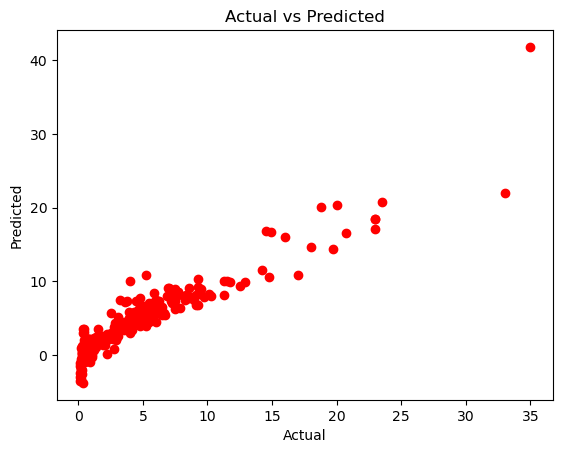

In [30]:
plt.scatter(Y_train,train_data_pred,color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [31]:
#prediction on training data
test_data_pred=lin_reg_model.predict(X_test)

In [32]:
#use R^2 metric evaluation
error2_score=metrics.r2_score(Y_test,test_data_pred)
print("R square error :",error2_score)

R square error : 0.8365766715025409


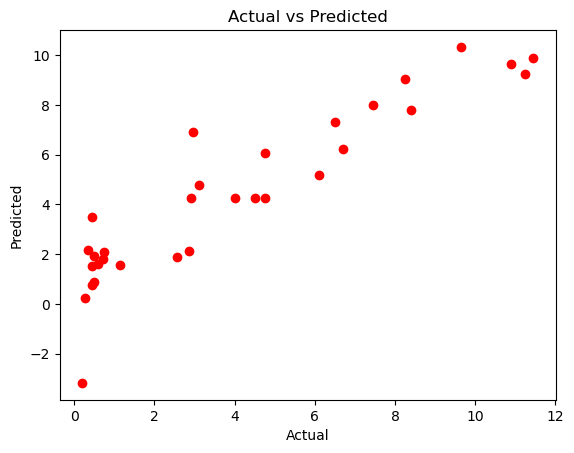

In [35]:
plt.scatter(Y_test,test_data_pred,color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

Use Lasso Regression

R square error : 0.8427856123435794


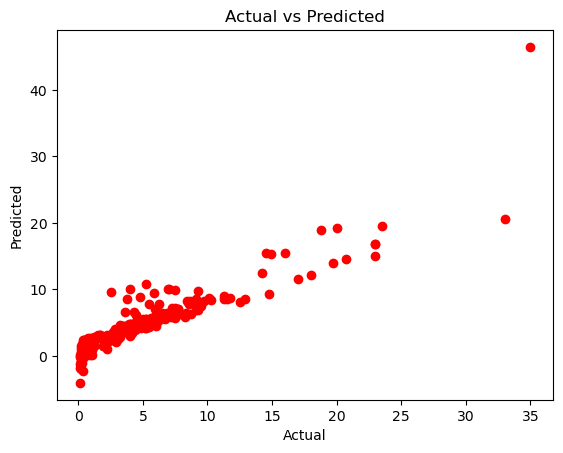

In [37]:
#load linear regression model
las_reg_model=Lasso()
#fit the model
las_reg_model.fit(X_train,Y_train)
#prediction on training data
train_data_pred=las_reg_model.predict(X_train)
#use R^2 metric evaluation
error_score=metrics.r2_score(Y_train,train_data_pred)
print("R square error :",error_score)

plt.scatter(Y_train,train_data_pred,color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

R square error : 0.9148157845262993


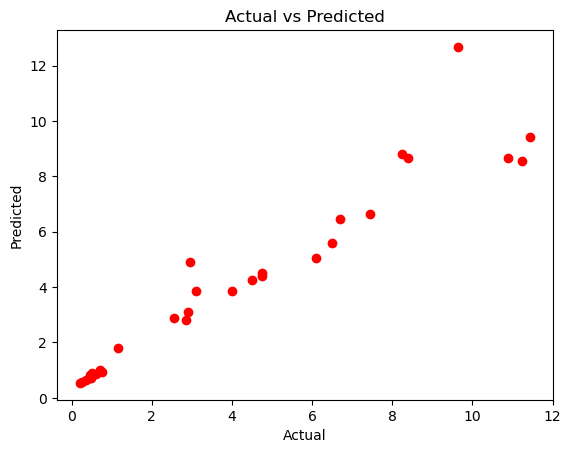

In [38]:
#load linear regression model
las_reg_model=Lasso()
#fit the model
las_reg_model.fit(X_test,Y_test)
#prediction on training data
train_data_pred=las_reg_model.predict(X_test)
#use R^2 metric evaluation
error_score=metrics.r2_score(Y_test,train_data_pred)
print("R square error :",error_score)

plt.scatter(Y_test,train_data_pred,color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()